In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
DF = pd.read_csv('Telecom_customer_churn.csv')

In [3]:
DF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
DF.shape

(7043, 21)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
DF.nunique() #unique elements in each column

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Lets check for null values

In [7]:
DF.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values.

#### Checking for blank spaces, random characters in each column

In [8]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
col = ['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
for c in col:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((DF[c] == s).sum())

  in customerID =  0
? in customerID =  0
- in customerID =  0
 ? in customerID =  0
 - in customerID =  0
?  in customerID =  0
-  in customerID =  0
 ?  in customerID =  0
 -  in customerID =  0
NA in customerID =  0
N/A in customerID =  0
 NA in customerID =  0
 N/A in customerID =  0
  in gender =  0
? in gender =  0
- in gender =  0
 ? in gender =  0
 - in gender =  0
?  in gender =  0
-  in gender =  0
 ?  in gender =  0
 -  in gender =  0
NA in gender =  0
N/A in gender =  0
 NA in gender =  0
 N/A in gender =  0
  in SeniorCitizen =  0
? in SeniorCitizen =  0
- in SeniorCitizen =  0
 ? in SeniorCitizen =  0
 - in SeniorCitizen =  0
?  in SeniorCitizen =  0
-  in SeniorCitizen =  0
 ?  in SeniorCitizen =  0
 -  in SeniorCitizen =  0
NA in SeniorCitizen =  0
N/A in SeniorCitizen =  0
 NA in SeniorCitizen =  0
 N/A in SeniorCitizen =  0
  in Partner =  0
? in Partner =  0
- in Partner =  0
 ? in Partner =  0
 - in Partner =  0
?  in Partner =  0
-  in Partner =  0
 ?  in Partner =

##### It is observed that column TotalCharges has 11 blank space values, which are null values.

In [9]:
DF[DF['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
DF['TotalCharges'] = DF['TotalCharges'].replace(" ",np.nan) #converting blank values to null values

In [11]:
DF.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
DF['TotalCharges']= DF['TotalCharges'].astype(float)

### Dataset Description

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

Examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

#### Feature Columns:

 
 1   gender            
 
 2   SeniorCitizen 
 
 3   Partner           
 
 4   Dependents        
 
 5   tenure            
 
 6   PhoneService      
 
 7   MultipleLines     
 
 8   InternetService   
 
 9   OnlineSecurity    
 
 10  OnlineBackup      
 
 11  DeviceProtection  
 
 12  TechSupport       
 
 13  StreamingTV      
 
 14  StreamingMovies   
 
 15  Contract          
 
 16  PaperlessBilling  
 
 17  PaymentMethod     
 
 18  MonthlyCharges    
 
 19  TotalCharges  
 
####  Target/Label Column:

1. Churn 

#### Getting the basic summary and statistical information of the data.

In [13]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges has null values.

In [15]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [16]:
DF.dtypes[DF.dtypes != 'object']#Identifying the Continuous/discrete Columns

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [17]:
DF.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Higher std than mean in TotalCharges indicates skewness. Big Difference between 75% and max in MonthlyCharges and TotalCharges indicates presence of skewness.

#### Imputing Null values in TotalCharges

<AxesSubplot:xlabel='TotalCharges'>

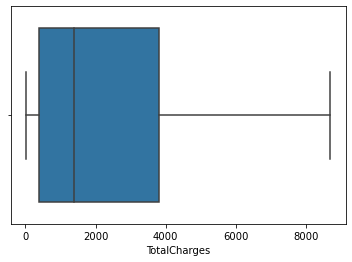

In [18]:
sns.boxplot(DF.TotalCharges)

#### Using KNN Imputation technique for imputing missing data.

In [19]:
from sklearn.impute import KNNImputer

In [20]:
imp = KNNImputer(n_neighbors=2)

In [21]:
DF[['TotalCharges']] = imp.fit_transform(DF[['TotalCharges']])

In [22]:
DF.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no more null values in the dataframe.

#### Dropping column customerID since it doesn't contribute to building a good model for predicting the target variable values.

In [23]:
DF.drop(columns='customerID',inplace=True)

In [24]:
DF.shape

(7043, 20)

### Interpreting Relationship between Independent  and Dependent Variables

#### Analyzing the Target Class

In [25]:
DF.Churn.unique()

array(['No', 'Yes'], dtype=object)

#### There are 2 unique catergorical values in the Label column / target variable.

In [26]:
DF['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Class   
'No'   : Has 5174 values

'Yes'   : Has 1869 values



<AxesSubplot:xlabel='Churn', ylabel='count'>

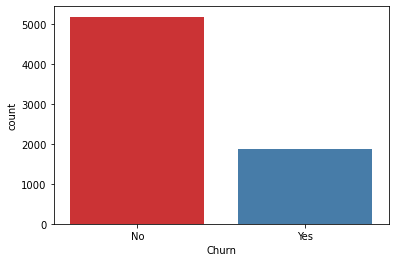

In [27]:
sns.countplot(DF['Churn'], palette="Set1")

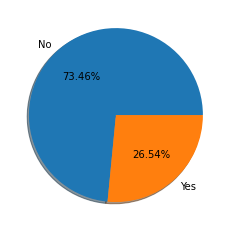

In [28]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(DF['Churn'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

Class   
'No'   : Has 73.46% of total values

'Yes'  : Has 26.54% of total values




#### Classes are imbalanced.

#### Analyzing Feature column Catergorical Classes

In [29]:
DF.dtypes[DF.dtypes == 'object'] #Identifying the Categorical Columns

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [30]:
DF['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

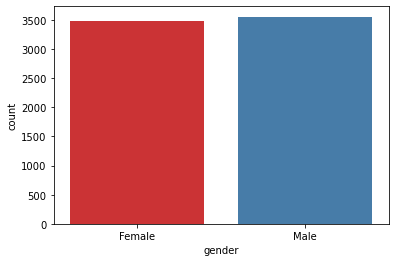

In [31]:
sns.countplot(DF['gender'], palette="Set1")

Numbers of Female and Male customers are fairly balanced.

In [32]:
DF['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

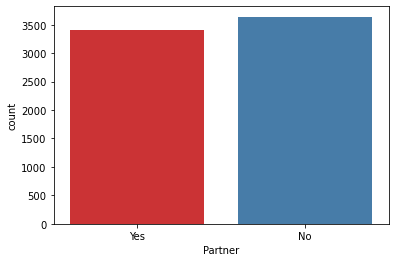

In [33]:
sns.countplot(DF['Partner'], palette="Set1")

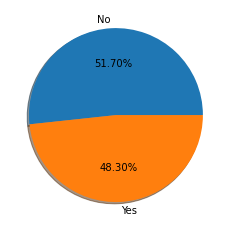

In [34]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(DF['Partner'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

48.03% of customers are Partners

In [35]:
DF['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

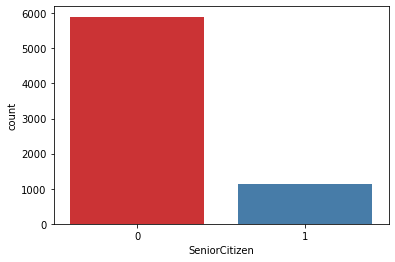

In [36]:
sns.countplot(DF['SeniorCitizen'], palette="Set1")

Majority of customers are not Senior Citizens

In [37]:
DF['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

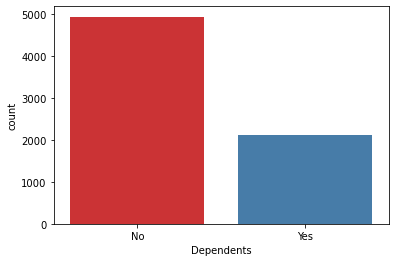

In [38]:
sns.countplot(DF['Dependents'], palette="Set1")

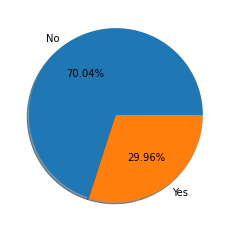

In [39]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(DF['Dependents'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

70.04% customers are Dependents while 29.96% are not.

In [40]:
DF['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

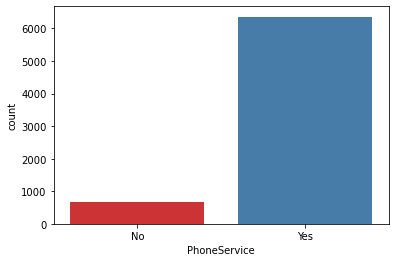

In [41]:
sns.countplot(DF['PhoneService'], palette="Set1")

Majority of customers use PhoneService

In [42]:
DF['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

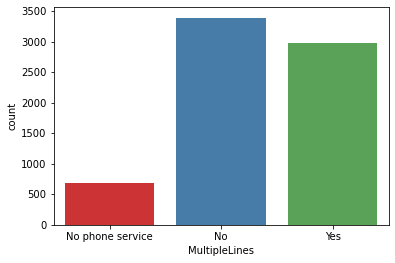

In [43]:
sns.countplot(DF['MultipleLines'], palette="Set1")

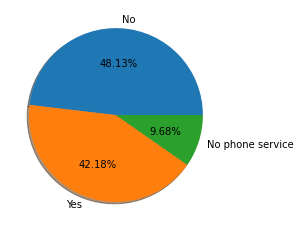

In [44]:
labels = 'No','Yes','No phone service'
fig, ax = plt.subplots()
ax.pie(DF['MultipleLines'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

48.13% do not have multiple lines, while 42.18% do and 9.68% don't have phone service.

In [45]:
DF['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

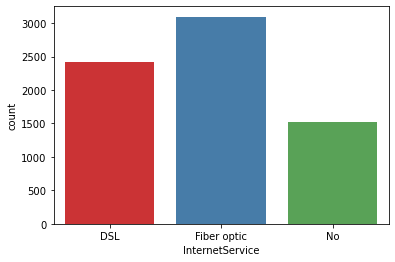

In [46]:
sns.countplot(DF['InternetService'], palette="Set1")

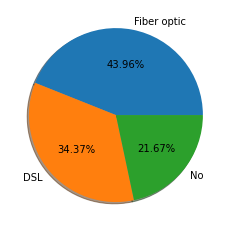

In [47]:
labels = 'Fiber optic','DSL','No'
fig, ax = plt.subplots()
ax.pie(DF['InternetService'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

43.96% customers have Fiber optic Internet connection, 34.37% have DSL internet connection while 21.67% have no internet connection.

In [48]:
DF['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

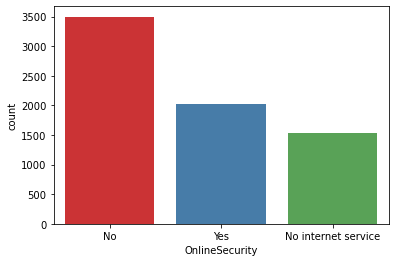

In [49]:
sns.countplot(DF['OnlineSecurity'], palette="Set1")

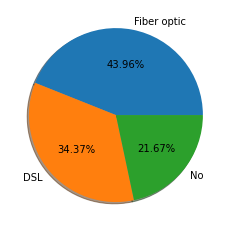

In [50]:
labels = 'Fiber optic','DSL','No'
fig, ax = plt.subplots()
ax.pie(DF['InternetService'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

In [51]:
DF['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

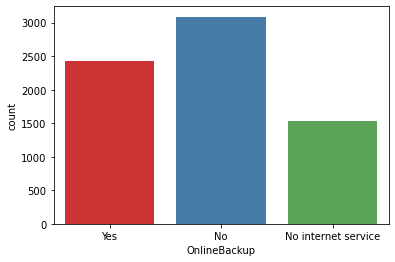

In [52]:
sns.countplot(DF['OnlineBackup'], palette="Set1")

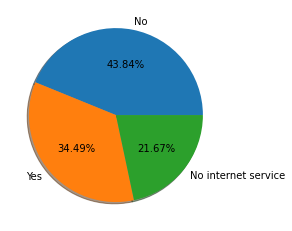

In [53]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(DF['OnlineBackup'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

43.84% customers do not have Online backup and 34.49% do while 21.67% don't have internet service.

In [54]:
DF['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

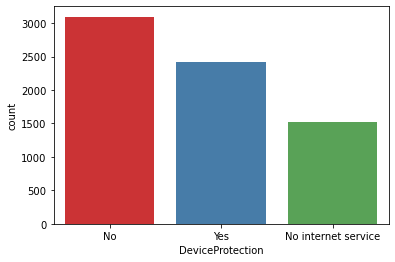

In [55]:
sns.countplot(DF['DeviceProtection'], palette="Set1")

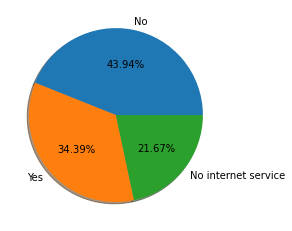

In [56]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(DF['DeviceProtection'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

43.94% customers do not have Device Protection and 34.39% do while 21.67% don't have internet service.

In [57]:
DF['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

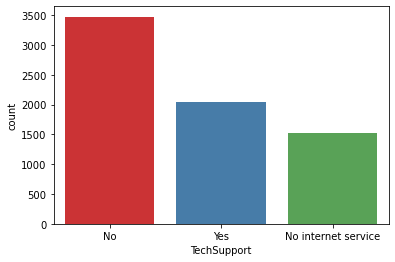

In [58]:
sns.countplot(DF['TechSupport'], palette="Set1")

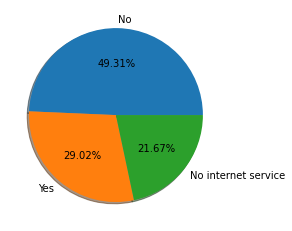

In [59]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(DF['TechSupport'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

49.31% customers do not avail Tech Support and 29.02% do while 21.67% don't have internet service.

In [60]:
DF['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

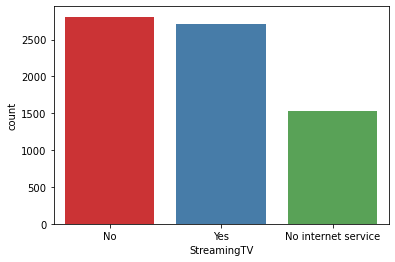

In [61]:
sns.countplot(DF['StreamingTV'], palette="Set1")

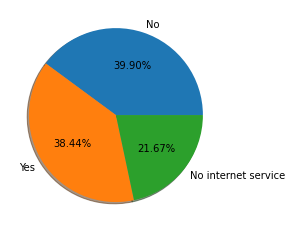

In [62]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(DF['StreamingTV'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

39.90% customers do not avail StreamingTV service and 38.44% do while 21.67% don't have internet service.

In [63]:
DF['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

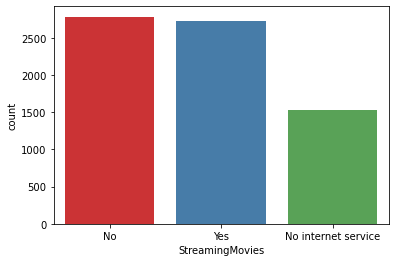

In [64]:
sns.countplot(DF['StreamingMovies'], palette="Set1")

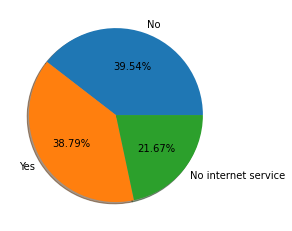

In [65]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(DF['StreamingMovies'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

39.54% customers do not avail StreamingMovies service and 38.54% do while 21.67% don't have internet service.

In [66]:
DF['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

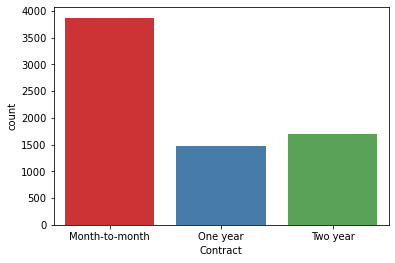

In [67]:
sns.countplot(DF['Contract'], palette="Set1")

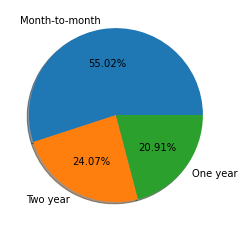

In [68]:
labels = 'Month-to-month','Two year','One year'
fig, ax = plt.subplots()
ax.pie(DF['Contract'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

55.02% customers have Month-to-month subscription contract and 24.07% customers have Two year subscription contract while 20.91% customers have One year subscription contract.

In [69]:
DF['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

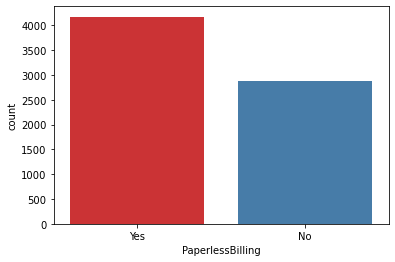

In [70]:
sns.countplot(DF['PaperlessBilling'], palette="Set1")

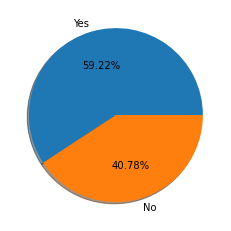

In [71]:
labels = 'Yes','No'
fig, ax = plt.subplots()
ax.pie(DF['PaperlessBilling'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

59.22% customers receive PaperlessBilling and 40.78% customers don't.

In [72]:
DF['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

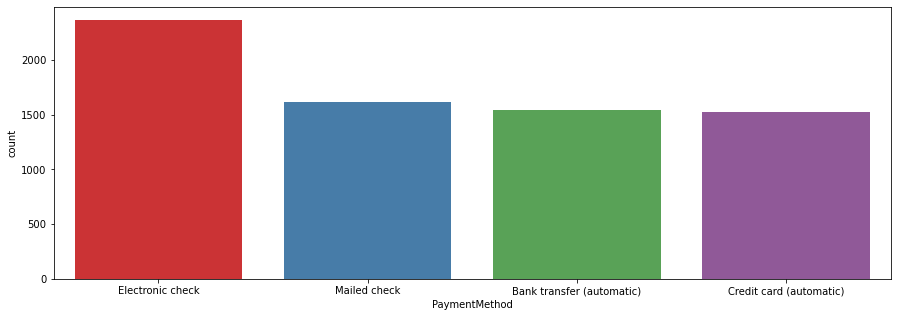

In [73]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(DF['PaymentMethod'], palette="Set1")

Majority of subscribers pay via Electronic check

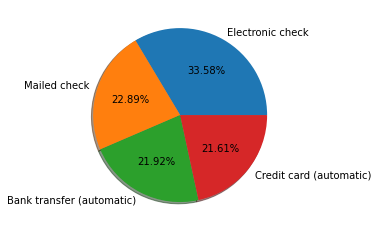

In [74]:
labels = 'Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'
fig, ax = plt.subplots()
ax.pie(DF['PaymentMethod'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

33.58% customers pay via Electronic check, 22.89% customers pay via Mailed check, 21.92% customers pay via Bank transfer (automatic) and 21.61% customers pay via Credit card (automatic).

#### Analyzing Feature columns with Continuous Data.

In [75]:
DF.dtypes[DF.dtypes != 'object']#Identifying the Continuous/discrete Columns

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

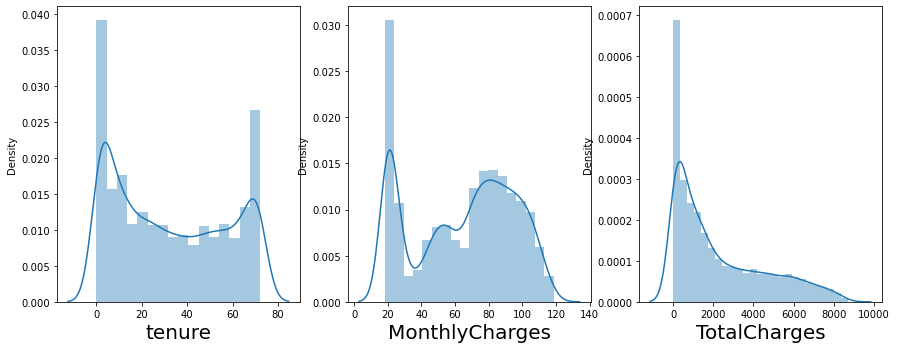

In [76]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in DF[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Tenure has bimodal distribution and MonthlyCharges has Multimodal distribution. Total Charges data distribution is skewed.

In [78]:
DF[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

TotalCharges data distribution is skewed.

### Interpreting Relationship between Dependent Variable and Independent Variables

##### 'Churn' vs Continuous/Discrete Data Columns

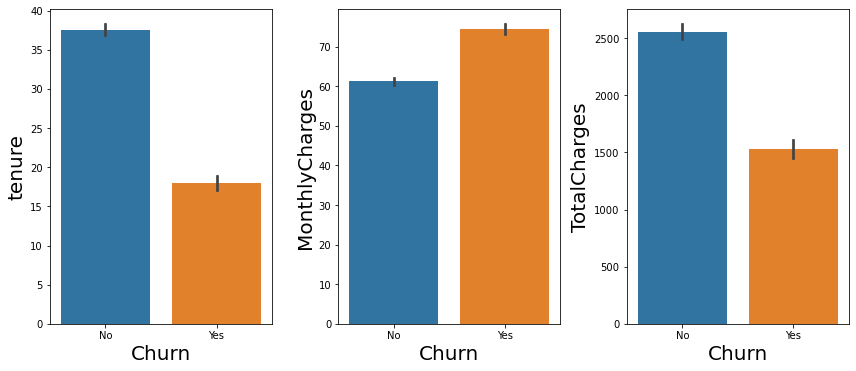

In [79]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF['Churn']
X = DF[['tenure','MonthlyCharges','TotalCharges']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Churn',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:
    
Majority of customers who are retained have higher tenure period while majority churn depends on lower tenure.

Higher monthly Charges result in greater Churn rates.

Customers who have paid greater charges in total are retained while those who paid lesser contribute more to churn rate.

#### 'Churn' vs Categorical Data Columns

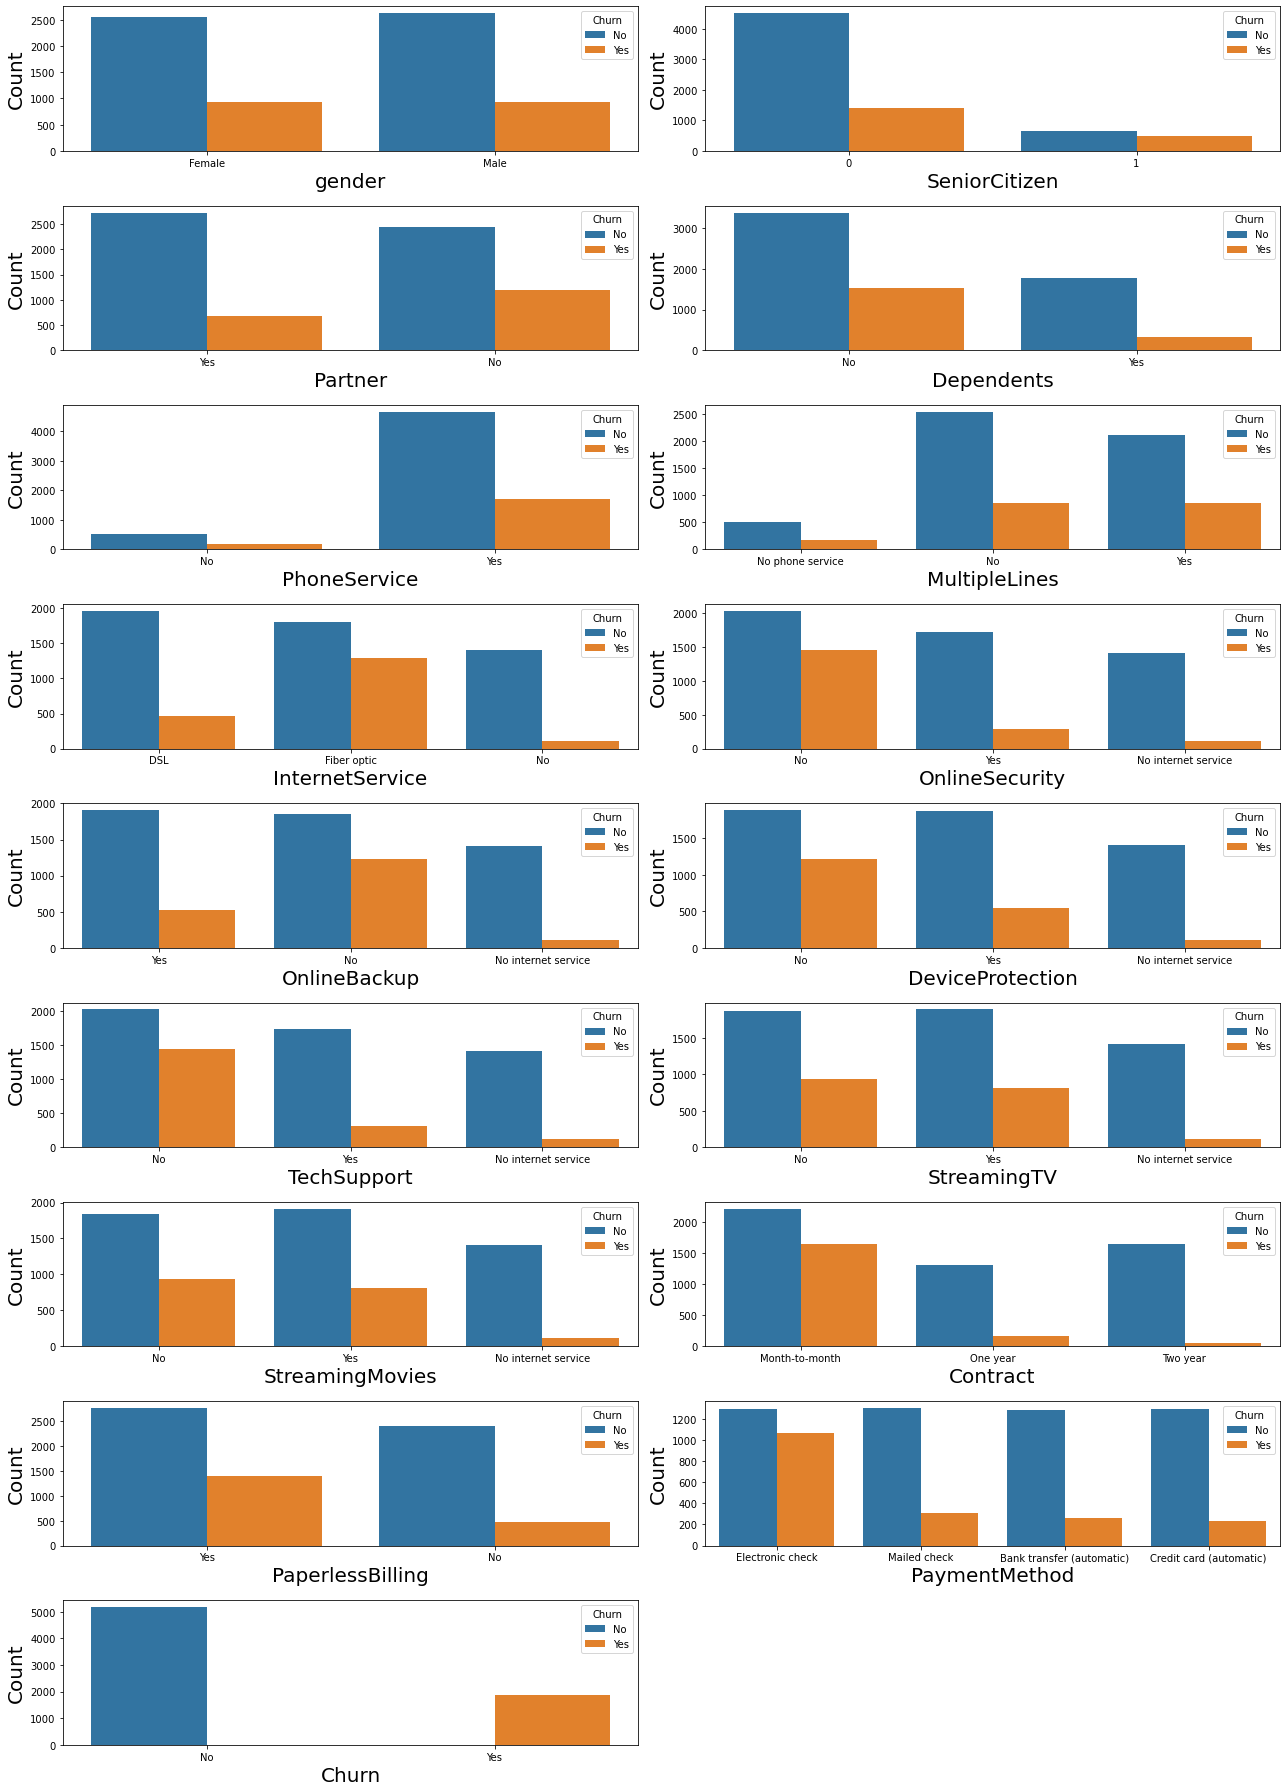

In [80]:
plt.figure(figsize=(18,25),facecolor='white')
plotnum=1
y = DF['Churn']
X = DF.drop(columns = ['tenure','MonthlyCharges','TotalCharges'])
for col in X:
    if plotnum<=23:
        plt.subplot(9,2,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

Gender doesn't seem to be a good indicator of churn rate.

Senior Citizen doesn't seem to be a good indicator of churn rate.

Those who are not Partners contribute somewhat to churn rate.

Those who are dependents contribute less to churn rate, while those who aren't contribute more to Churn rate.

Those who avail PhoneService are retained more.

Those who do not have multiple lines are retained more.

Those who avail Fiber optic Internet service contribute more to churn rate.

Those who do not avail to Online Security contribute most to churn rate.

Those who do not avail to Online Backup contribute most to churn rate.

Those who do not avail to Device Protection contribute most to churn rate.

Those who do not avail to Tech Support contribute most to churn rate.

StreamingTv doesn't seem to be a good indicator of churn rate.

StreamingMovies doesn't seem to be a good indicator of churn rate.

Customers who have a month - to- month subscription contract are more likely to contribute to churn rate.

Customers who avail  Paperless billing contribute more to churn rate.

Customers who pay via Electronic Check contribute more to churn rate.


### Checking for Outliers in columns with continuous distribution

In [81]:
X = DF.drop(columns = ['Churn'])
y = DF['Churn']

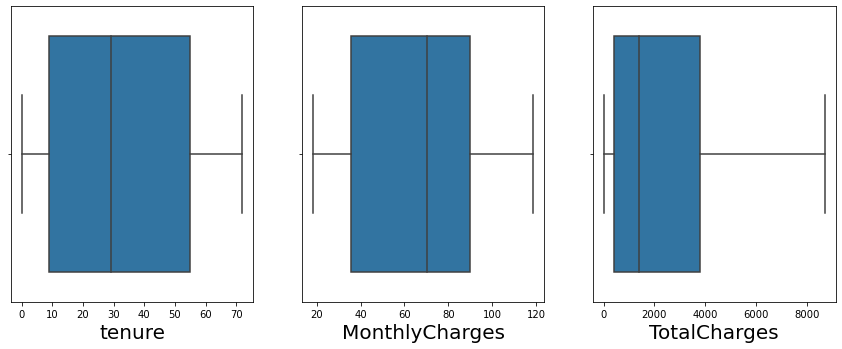

In [82]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There are no outliers present.

#### Checking for Skewness in Data

In [83]:
X[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

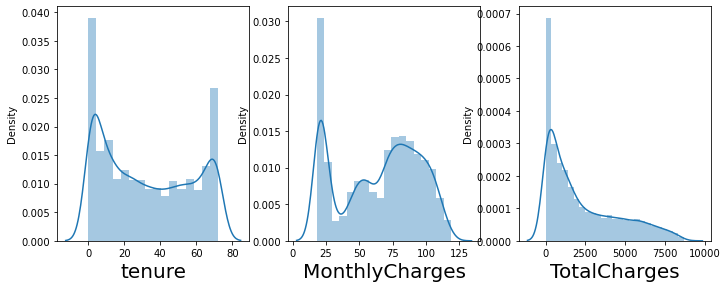

In [84]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in X[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Considerable skewness exists in the data distribution of TotalCharges.

#### Reducing skewness 

In [85]:
df4 = X[['TotalCharges']]

In [89]:
df5=np.sqrt(X[['TotalCharges']])

In [90]:
df5.skew()

TotalCharges    0.307849
dtype: float64

In [91]:
df5.index = DF.index

In [92]:
DF[['TotalCharges']]=df5[['TotalCharges']]

In [93]:
DF[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.307849
dtype: float64

There is no more skewness.

### Encoding the  categorical Feature Columns.

#### Encoding using OrdinalEncoder()

In [94]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [95]:
for col in DF.columns:
    if DF[col].dtypes == 'object':
        DF[col]=enc.fit_transform(DF[col].values.reshape(-1,1))

In [96]:
DF

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,5.463515,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,43.468379,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,10.399519,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,42.903963,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,12.314625,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,44.615020,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,85.807342,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,18.613167,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,17.509997,1.0


### Finding Correlation 

In [97]:
C_corr = DF.corr()
C_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000839,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106805,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.339866,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.079060,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.866617,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.095216,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.464785,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.202740,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.251861,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.363101,-0.195525


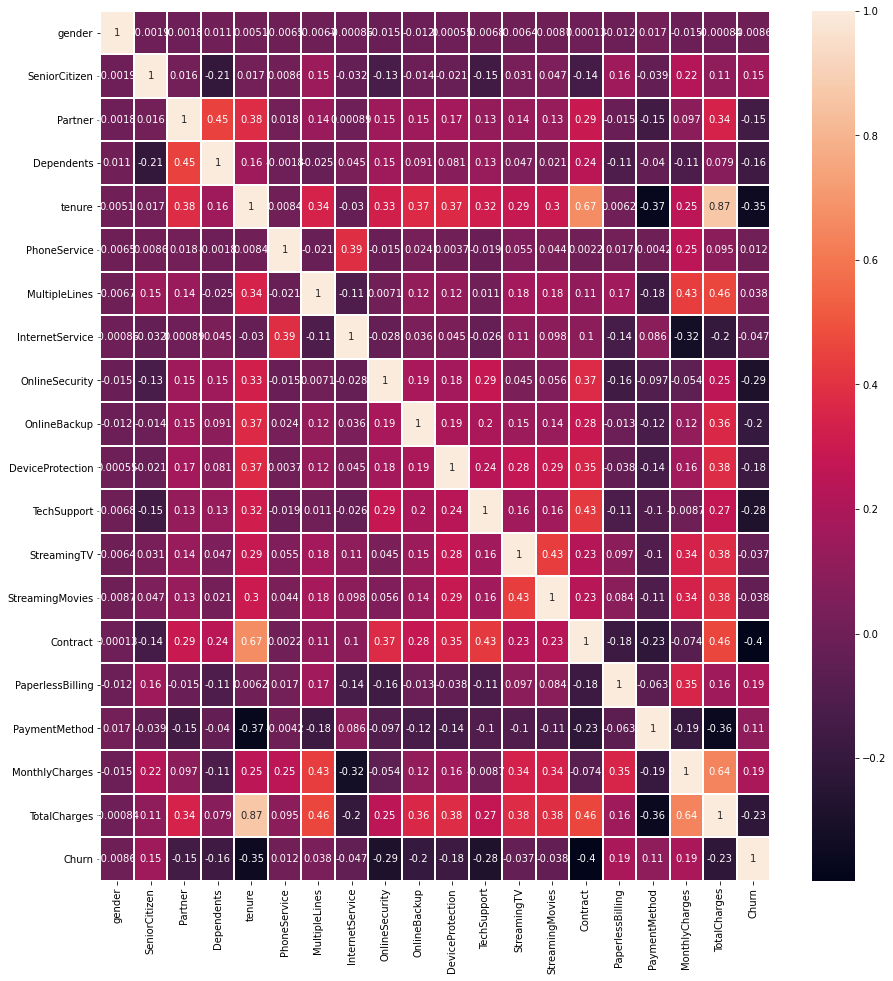

In [98]:
plt.figure(figsize=(15,16))
sns.heatmap(C_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

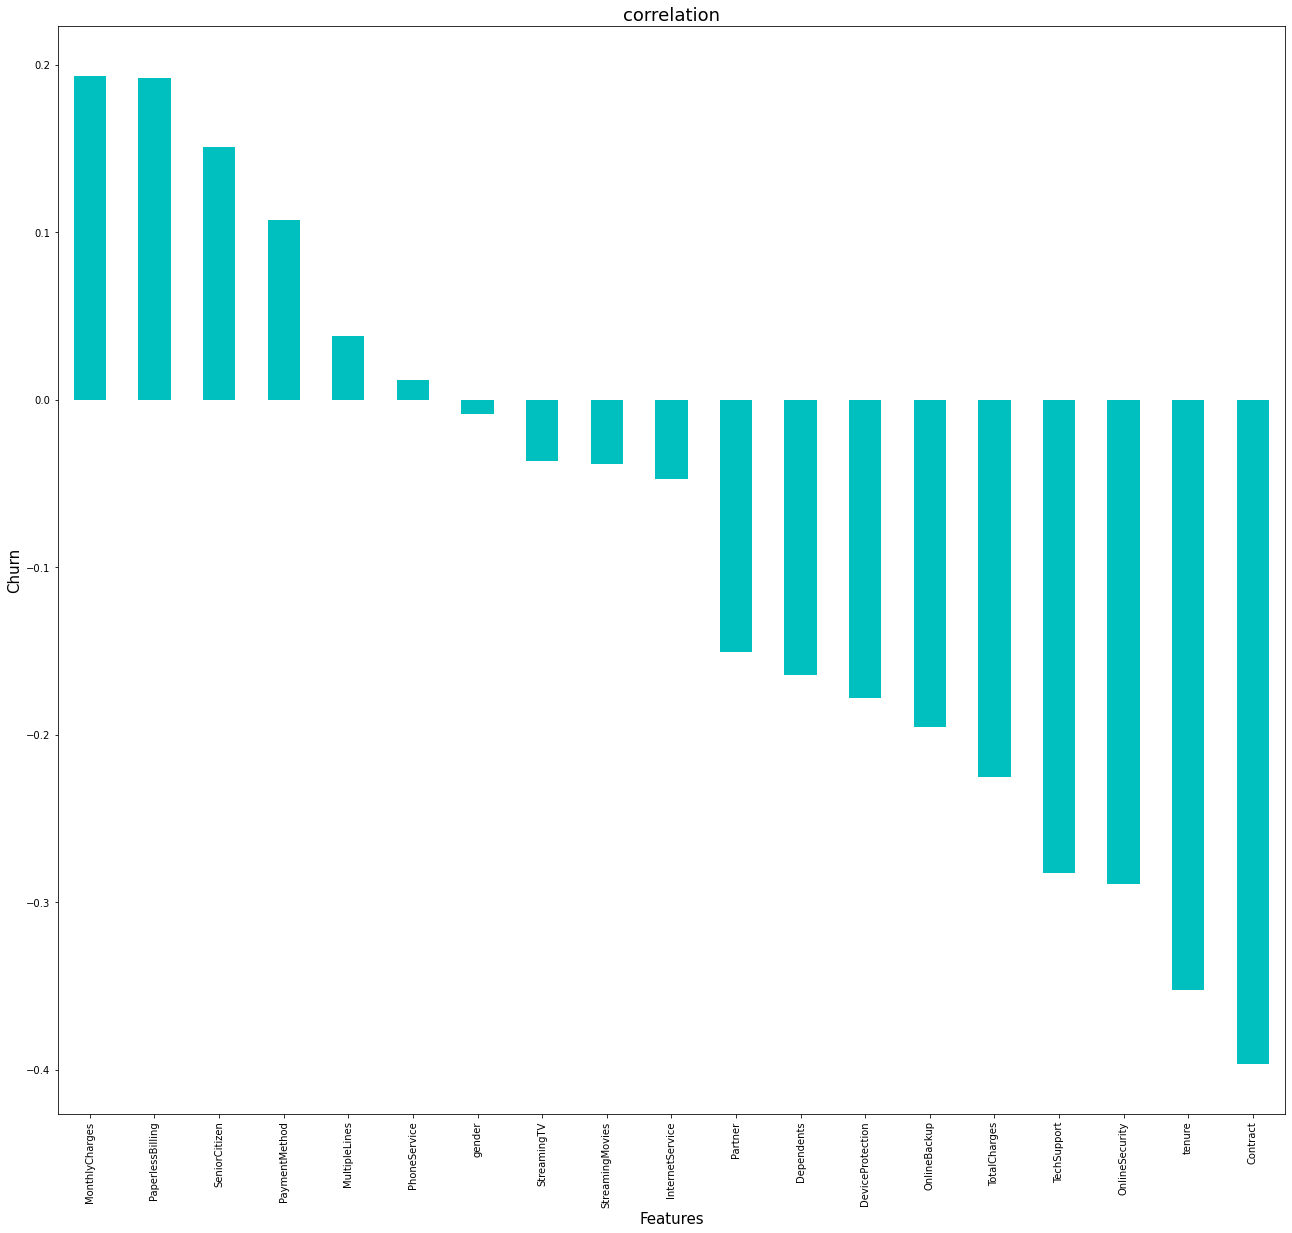

In [99]:
plt.figure(figsize = (22,20))
DF.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Churn',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

MonthlyCharges,PaperlessBilling, SeniorCitizen have the highest positive correlation with Churn, while Contract,tenure,TechSupport,TotalCharges,OnlineBackup,DeviceProtection have the highest negative correlation with Churn.

### Feature Selection

In [100]:
X = DF.drop(columns = ['Churn'])
y = DF['Churn']

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
vif = pd.DataFrame()

In [105]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [107]:
vif

,Features,vif
0,gender,1.001818
1,SeniorCitizen,1.149647
2,Partner,1.462367
3,Dependents,1.382766
4,tenure,14.043532
5,PhoneService,1.622323
6,MultipleLines,1.398968
7,InternetService,1.863580
8,OnlineSecurity,1.265961
9,OnlineBackup,1.206244


Tenure and TotalCharges have high multi collinearity

### Principle Component Analysis

In [108]:
from sklearn.decomposition import PCA

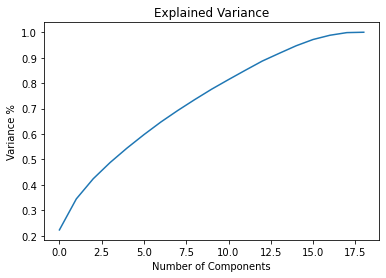

In [109]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

17 components explain around 95% variance in Data

### Selecting Kbest Features

In [110]:
from sklearn.feature_selection import SelectKBest, f_classif

In [111]:
bestfeat = SelectKBest(score_func = f_classif, k = 19)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [112]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(20,'Score'))

             Feature        Score
14          Contract  1315.088872
4             tenure   997.268010
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
18      TotalCharges   376.766118
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674
5       PhoneService     1.004266
0             gender     0.522257


In [113]:
x_best = X.drop(columns=['gender','TotalCharges',]).copy() #droping column with lowest score and column with high multicollinearity

In [114]:
scaled_x_best = scaler.fit_transform(x_best)

### This is a Classification problem as Target column ('Churn') has Catergorical type of Data.


## Classification Model Building

### Balancing out classes in Label column 'Churn' using SMOTE technique.

In [115]:
from imblearn.over_sampling import SMOTE as sm

In [116]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Finding the best random state

In [118]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8556733167082294 on random_state: 60


In [119]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31,random_state = 60)

In [120]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [122]:
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
XGBC= XGBClassifier()
ADBC = AdaBoostClassifier()
LOGR= LogisticRegression()
SVC =  SVC()
KNN = KNeighborsClassifier()

### Training and testing the Models

In [123]:
from sklearn.model_selection import cross_val_score as cvs

In [124]:
models=[RFC,DTC,XGBC,ADBC,LOGR,SVC,KNN]
for m in models:
    m.fit(x_train,y_train.ravel())
    pred=m.predict(x_test)
    accu = classification_report(y_test,pred)
    conf_matrx = confusion_matrix(y_test,pred)
    CVS=cvs(m,smt_x,smt_y,cv=5).mean()
    ROC_AUC=roc_auc_score(y_test,pred)
    print(m,"Results:")
    print("Confusion Matrix:",conf_matrx)
    print("Accuracy :",accu)
    print("Cross Validation Score:",CVS)
    print("ROC AUC Score:",ROC_AUC)
    print("\n")
    

RandomForestClassifier() Results:
Confusion Matrix: [[1382  235]
 [ 239 1352]]
Accuracy :               precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1617
         1.0       0.85      0.85      0.85      1591

    accuracy                           0.85      3208
   macro avg       0.85      0.85      0.85      3208
weighted avg       0.85      0.85      0.85      3208

Cross Validation Score: 0.8452942096697745
ROC AUC Score: 0.8522245764770682


DecisionTreeClassifier() Results:
Confusion Matrix: [[1247  370]
 [ 331 1260]]
Accuracy :               precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      1617
         1.0       0.77      0.79      0.78      1591

    accuracy                           0.78      3208
   macro avg       0.78      0.78      0.78      3208
weighted avg       0.78      0.78      0.78      3208

Cross Validation Score: 0.7827698507762391
ROC AUC Score: 0.7815679725978729


[21:52:0

### Based on comparing Accuracy Score results, with Cross Validation results, it is determined that RandomForest Classifier is the best model.

### ROC AUC curves 

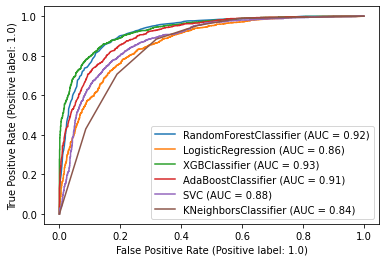

In [126]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,ADBC,SVC,KNN]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

### Based on the above graph and roc_auc_scores,XGB Classifier is the best model for the dataset, with AUC = 0.93 and roc_auc_score = 0.855

### Hyper Parameter Tuning

#### XGB Classifier

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [130]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=3,n_jobs = -1,verbose = 1)

In [131]:
GridCV.fit(x_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[22:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [132]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 0,
 'subsample': 1}

In [133]:
Best_mod1 = XGBClassifier(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 0,subsample = 1)
Best_mod1.fit(x_train,y_train)

[22:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=10, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
xgbpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

85.47381546134663


##### XGB Classifier has an accuracy of 85.47%

In [135]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[1380,  237],
       [ 229, 1362]], dtype=int64)

#### Random Forest Classifier

In [136]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [138]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3,n_jobs = -1,verbose = 1)

In [139]:
GridCV.fit(x_train,y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]},
             verbose=1)

In [140]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [141]:
Best_mod2 = RandomForestClassifier(n_estimators = 50,criterion = 'entropy', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)
Best_mod2.fit(x_train,y_train)
rfpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)


84.25810473815461


#### Random Forest Classifier has an accuracy of 84.25%

In [142]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[1332,  285],
       [ 220, 1371]], dtype=int64)

#### On comparing the accuracies of the 2 models it is determined that XGB classifier is the better model.

#### Saving The Model

In [143]:
import joblib
joblib.dump(Best_mod1,"BestModelCustomer_churn.pkl")

['BestModelCustomer_churn.pkl']

#### Loading The Model

In [144]:
mod=joblib.load("BestModelCustomer_churn.pkl")

In [145]:
print(mod.predict(x_test))

[0. 1. 0. ... 1. 0. 0.]


In [146]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head()

,Predictions,Actual Values
1386,0.0,0.0
8490,1.0,1.0
2777,0.0,0.0
2642,1.0,1.0
8682,1.0,1.0
